In [1]:
import pandas as pd


df = pd.read_csv('data/nasa/daily-sunspots/SN_d_tot_V2.0.csv',delimiter=";",header=None)

df.head()

,0,1,2,3,4,5,6,7
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1


In [2]:
df.columns=['Year','Month','Day','Date','TotalSunspots','StdDevSunspots','NumberofObversvatioins','Definitive']

In [3]:
import pandas as pd
import datetime as dt

# Function to convert year.fraction to datetime
def convert_to_datetime(year_fraction):
    year = int(year_fraction)
    fraction = year_fraction - year
    start_of_year = dt.datetime(year, 1, 1)
    days_in_year = (dt.datetime(year + 1, 1, 1) - start_of_year).days
    exact_date = start_of_year + pd.to_timedelta(fraction * days_in_year, unit='D')
    return exact_date

# Apply the function
df['date'] = df['Date'].apply(convert_to_datetime)



In [4]:
df.set_index('date',inplace=True)

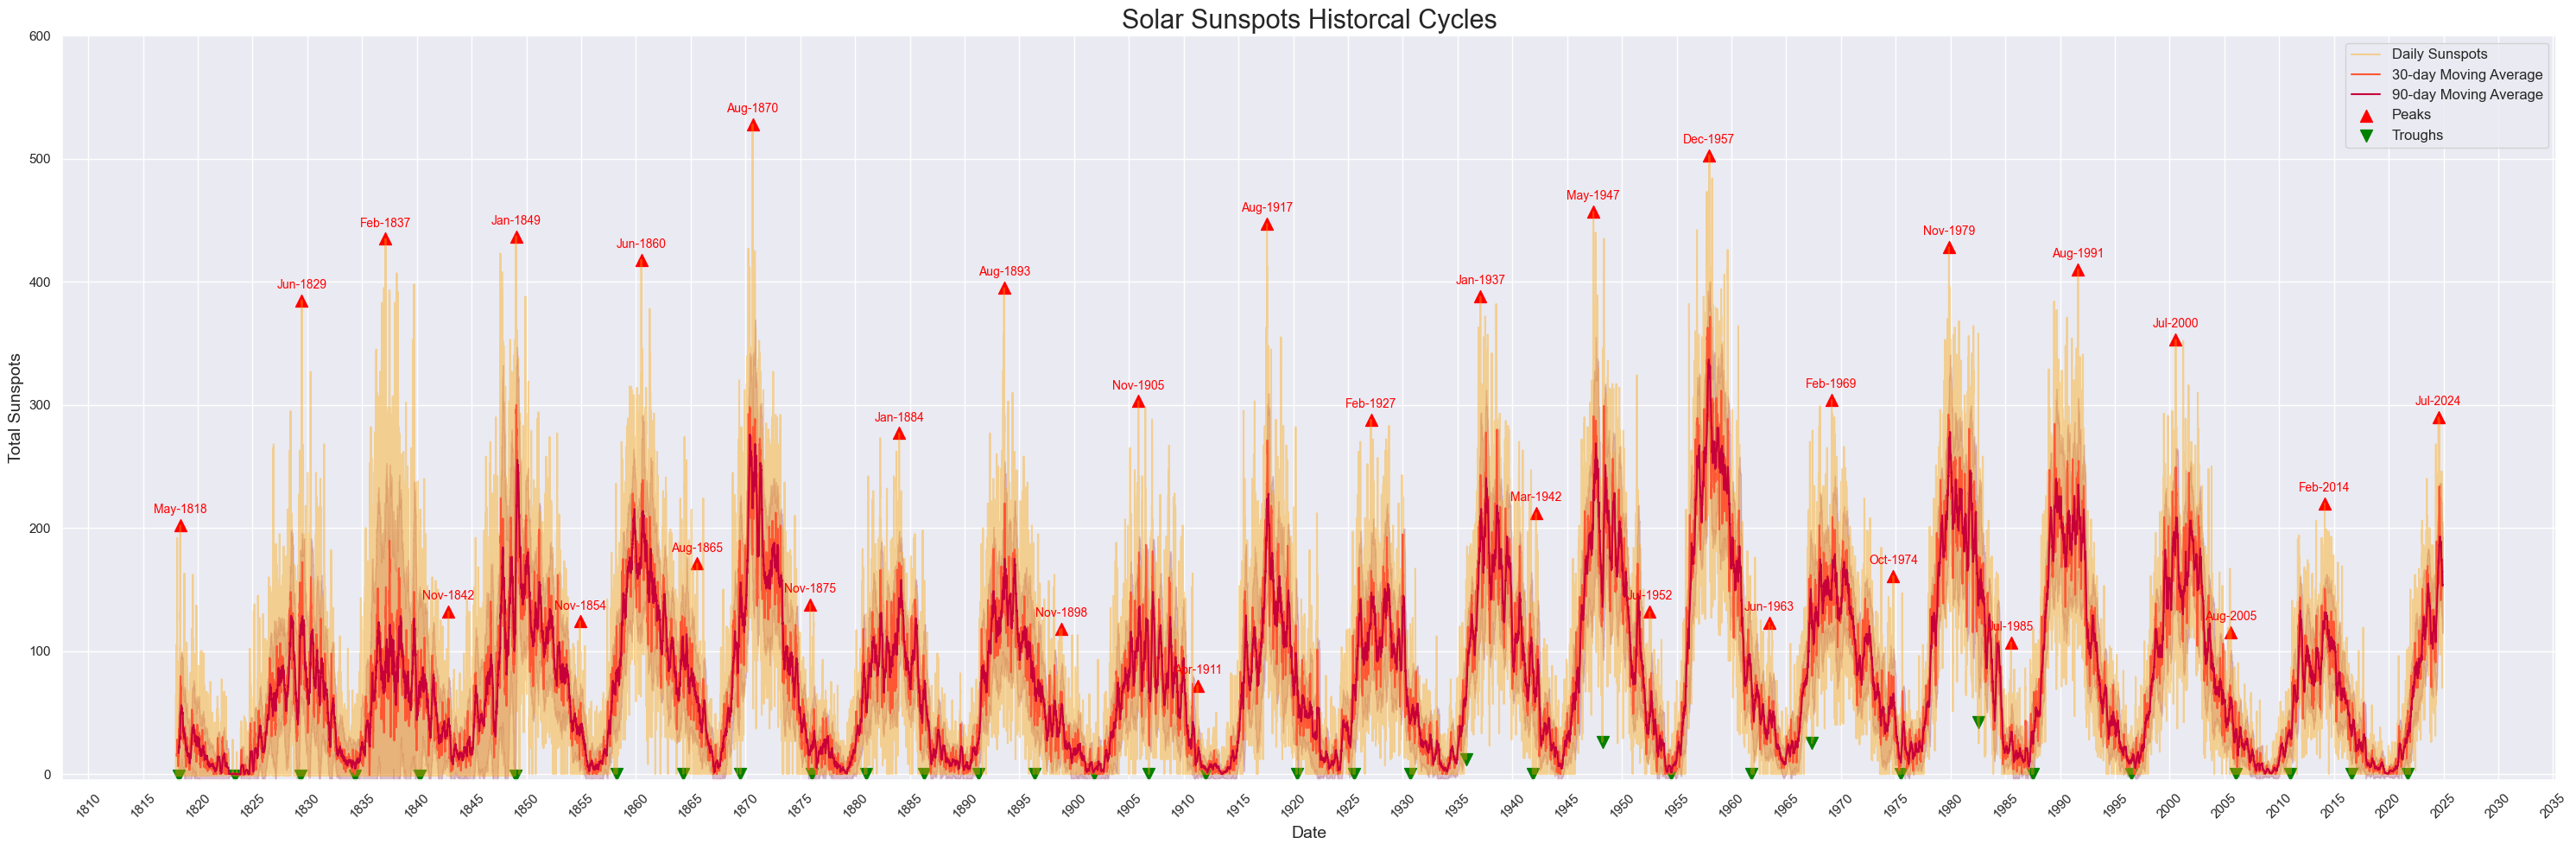

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from matplotlib import dates as mdates

def plot_sunspots_comprehensive_analysis(d,save_path=None):
    # Use a solar-themed Seaborn style
    sns.set_theme(style="darkgrid", palette="flare")
    
    plt.figure(figsize=(30, 10))

    # Rolling Trends Plot with Peaks and Troughs
    rolling_mean_30 = df['TotalSunspots'].rolling(window=30).mean()
    rolling_mean_90 = df['TotalSunspots'].rolling(window=90).mean()
    rolling_std = df['TotalSunspots'].rolling(window=90).std()

    plt.plot(df.index, df['TotalSunspots'], label='Daily Sunspots', alpha=0.4, color='#FFA500')
    plt.plot(df.index, rolling_mean_30, label='30-day Moving Average', color='#FF5733')
    plt.plot(df.index, rolling_mean_90, label='90-day Moving Average', color='#C70039')
    plt.fill_between(df.index, rolling_mean_90 - rolling_std, 
                     rolling_mean_90 + rolling_std, color='#900C3F', alpha=0.2)

    # Peaks and Troughs
    peaks, _ = find_peaks(df['TotalSunspots'], distance=1825, prominence=60)
    troughs, _ = find_peaks(-df['TotalSunspots'], distance=1825, prominence=60)

    plt.scatter(df.index[peaks], df['TotalSunspots'].iloc[peaks], 
                color='red', label='Peaks', marker='^', s=100)
    plt.scatter(df.index[troughs], df['TotalSunspots'].iloc[troughs], 
                color='green', label='Troughs', marker='v', s=100)

    # Annotate peaks
    for peak in peaks:
        date_str = df.index[peak].strftime('%b-%Y')
        plt.annotate(date_str, 
                     (df.index[peak], df['TotalSunspots'].iloc[peak]),
                     textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='red')

    plt.title('Solar Sunspots Historcal Cycles', fontsize=22)
    plt.ylabel('Total Sunspots', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.legend(fontsize=12)

    # Reduce Date Frequency on X-axis
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Major ticks every 5 years
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[1, 7]))  # Minor ticks every 6 months
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)
    # Set y-axis limits
    plt.ylim(-5, 600)
    # Adjust layout
    plt.tight_layout()


    # Save the figure if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()

# Example call
plot_sunspots_comprehensive_analysis(df, save_path='images/sunspots_analysis.png')


